In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [11]:
# Read the admission file
file_path = 'admissions.csv'
df = pd.read_csv(file_path)
# Group the data by suject_id and get the count of each suject_id

grouped_data = df.groupby('subject_id').size().reset_index(name='Frequency')

# Merge the grouped data back to the original DataFrame on 'subject_id'
df = pd.merge(df, grouped_data, on='subject_id', how='left')

# change the data type of admittime and dischtime from object to date and time
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df.head()


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,Frequency
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,5/6/2180 19:17,5/6/2180 23:30,0,4
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,6/26/2180 15:54,6/26/2180 21:31,0,4
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,8/5/2180 20:58,8/6/2180 1:44,0,4
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,7/23/2180 5:54,7/23/2180 14:00,0,4
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,3/3/2160 21:55,3/4/2160 6:26,0,1


In [13]:
# check the datatypes of all the variables
df.dtypes

subject_id                       int64
hadm_id                          int64
admittime               datetime64[ns]
dischtime               datetime64[ns]
deathtime                       object
admission_type                  object
admit_provider_id               object
admission_location              object
discharge_location              object
insurance                       object
language                        object
marital_status                  object
race                            object
edregtime                       object
edouttime                       object
hospital_expire_flag             int64
Frequency                        int64
dtype: object

In [14]:
# Sort and group the admitime corresponding to subject_id
df.sort_values(by=['subject_id','admittime'], inplace=True)
grouped_data = df.groupby('subject_id').size().reset_index(name='Frequency')

In [15]:
visit_frequency_data = []

# Group the data by 'subject_id'
grouped_data = df.groupby('subject_id')

# Iterate over each subject_id
for subject_id, group_df in grouped_data:
    # Check if the frequency of visits for this subject_id is greater than 1
    if len(group_df) > 2:
        # Iterate over each row in the group DataFrame
        for i in range(len(group_df)-1):
            # Calculate the visit frequency
            visit_fre = group_df.admittime.iloc[i+1] - group_df.dischtime.iloc[i]
            # Append the results to the list as a dictionary
            visit_frequency_data.append({
                'Subject_ID': subject_id,
                'Visit_Frequency': visit_fre
                
            })

# Convert the list of dictionaries to a DataFrame
visit_frequency_df = pd.DataFrame(visit_frequency_data)

# Display the first 10 rows of the DataFrame
print(visit_frequency_df.head(20))

    Subject_ID    Visit_Frequency
0     10000032   50 days 01:12:00
1     10000032   25 days 17:46:00
2     10000032   11 days 05:49:00
3     10000826    6 days 01:09:00
4     10000826    6 days 04:48:00
5     10000935    2 days 16:52:00
6     10000935 1342 days 01:47:00
7     10000935   42 days 10:07:00
8     10000935   44 days 03:34:00
9     10000980  538 days 14:08:00
10    10000980  491 days 17:57:00
11    10000980  146 days 02:50:00
12    10000980   41 days 23:12:00
13    10000980   52 days 21:07:00
14    10000980  757 days 11:58:00
15    10001186   23 days 16:35:00
16    10001186  635 days 16:10:00
17    10001319  458 days 14:22:00
18    10001319 1206 days 08:22:00
19    10001338    6 days 18:17:00


In [86]:
visit_frequency_df.to_excel('visit_frequency_df.xlsx',sheet_name='Data' )

In [16]:
abnormal_visit = visit_frequency_df[(visit_frequency_df['Visit_Frequency'] >= pd.Timedelta(days=1)) & 
                                    (visit_frequency_df['Visit_Frequency'] < pd.Timedelta(days=15))]

# Display the filtered DataFrame
print(abnormal_visit)

        Subject_ID  Visit_Frequency
2         10000032 11 days 05:49:00
3         10000826  6 days 01:09:00
4         10000826  6 days 04:48:00
5         10000935  2 days 16:52:00
19        10001338  6 days 18:17:00
...            ...              ...
214771    19999784  1 days 17:40:00
214773    19999784 10 days 15:22:00
214774    19999784  9 days 14:43:00
214775    19999784  8 days 20:58:00
214776    19999784  7 days 19:02:00

[43936 rows x 2 columns]


In [88]:
abnormal_visit.to_excel('visit-bw_0_14.xlsx',sheet_name='Data' )

In [17]:
# Convert days and time to Number of days
abnormal_visit['Visit_Frequency_days'] = abnormal_visit['Visit_Frequency'].dt.days

C:\Users\srila\AppData\Local\Temp\ipykernel_21188\1498878423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_visit['Visit_Frequency_days'] = abnormal_visit['Visit_Frequency'].dt.days


In [18]:
abnormal_visit.Visit_Frequency_days.value_counts()

Visit_Frequency_days
1     4356
2     4062
3     4002
4     3691
5     3637
6     3410
7     3177
8     2813
9     2784
10    2572
11    2460
13    2455
12    2343
14    2174
Name: count, dtype: int64

In [102]:
fre.to_excel('fre.xlsx',sheet_name='Data' )

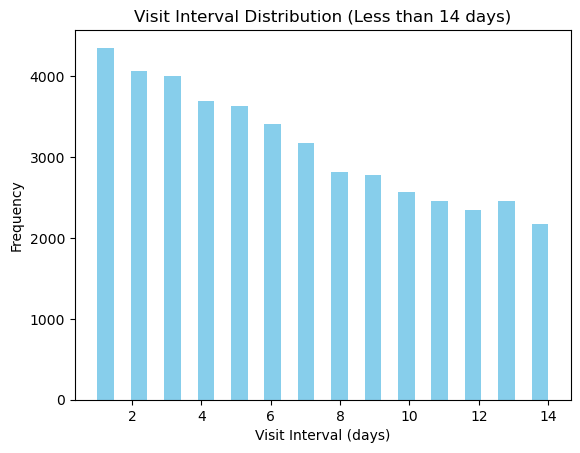

In [21]:
# Plotting the histogram with bin size of 1
plt.hist(abnormal_visit['Visit_Frequency_days'], color='skyblue', bins=27, range = (1,14))  
plt.xlabel('Visit Interval (days)')
plt.ylabel('Frequency')
plt.title('Visit Interval Distribution (Less than 14 days)')

# Show the plot
plt.show()